#### Import numpy, matplotlib.pyplot and make it inline

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score


#### Read RegData csv file into numpy array  (check your data)
##### Data source
https://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/slr/frames/frame.html


In [2]:
#RegData=np.loadtxt("RegData.csv", dtype=float)
from numpy import genfromtxt
Data = genfromtxt('RegData.csv', delimiter=',')

#### Explore your data

In [3]:
print(Data)

[[2.9000001  4.        ]
 [6.69999981 7.4000001 ]
 [4.9000001  5.        ]
 [7.9000001  7.19999981]
 [9.80000019 7.9000001 ]
 [6.9000001  6.0999999 ]
 [6.0999999  6.        ]
 [6.19999981 5.80000019]
 [6.         5.19999981]
 [5.0999999  4.19999981]
 [4.69999981 4.        ]
 [4.4000001  4.4000001 ]
 [5.80000019 5.19999981]]


#### Define variables X and y. Assign first column data to X and second column to y
<b>Note:</b> X is the independent variable (input to LR model) and y is the dependent variable (output)

In [4]:
X=Data[:,0]
y=Data[:,1]
X

array([2.9000001 , 6.69999981, 4.9000001 , 7.9000001 , 9.80000019,
       6.9000001 , 6.0999999 , 6.19999981, 6.        , 5.0999999 ,
       4.69999981, 4.4000001 , 5.80000019])

#### Explore your data

In [5]:
y

array([4.        , 7.4000001 , 5.        , 7.19999981, 7.9000001 ,
       6.0999999 , 6.        , 5.80000019, 5.19999981, 4.19999981,
       4.        , 4.4000001 , 5.19999981])

#### Plot the original data (scatter plot of X,y)

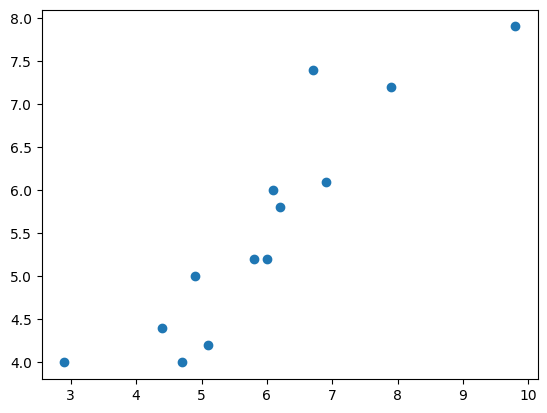

In [6]:
plt.scatter(X, y)
plt.show()

## LR Full Implementation

### Step1: Initialize parameters (theta_0 & theta_1) with random value or simply zero. Also choose the Learning rate. 

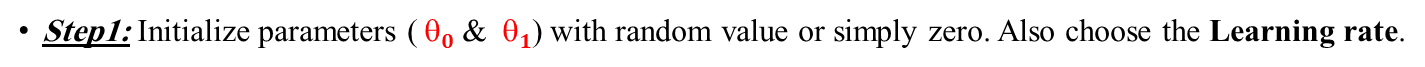

### Step2: Use (theta_0 & theta_1) to predict the output h(x)= theta_0 + theta_1 * x.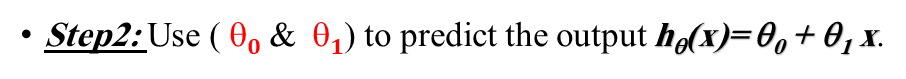
#### Note: you will need to iterate through all data points

### Step3: Calculate Cost function 𝑱(theta_0,theta_1 ).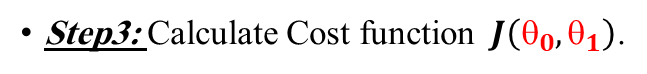
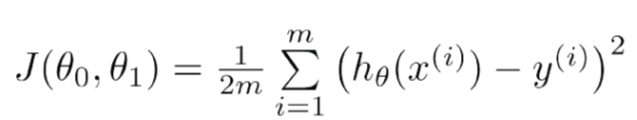

### Step4: Calculate the gradient.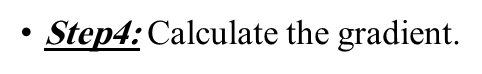
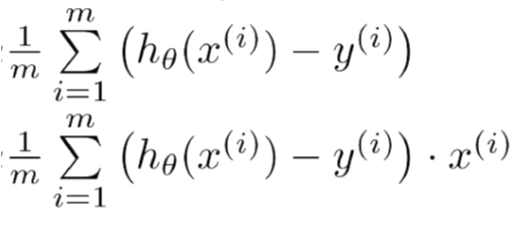

### Step5: Update the parameters (simultaneously).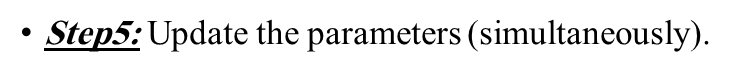
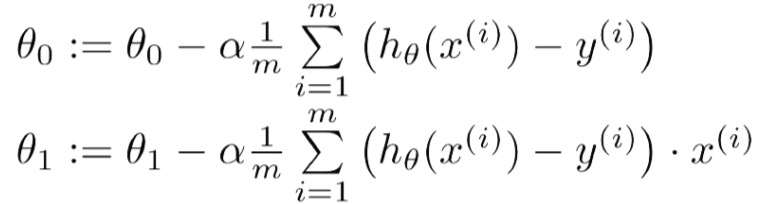

### Implmntation.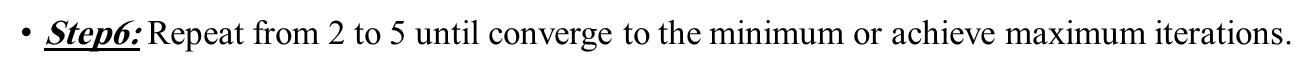

In [7]:
def Gd(X,y,alpha,loop=1000):
    cost=[]
    theta0s=[]
    theta1s=[]
    y_preds=[]
    theta_0,theta_1=0,0
    y=np.array(y)
    X=np.array(X)
    for itr in range(0,loop):
        y_predictd=theta_0+X.dot(theta_1)
        loss = np.square(y_predictd-y)
        MSE = np.sum(loss)/(2*len(X))
        d_theta_0=(1/len(X))*np.sum((y_predictd-y))
        d_theta_1=(1/len(X))*np.sum(np.dot((y_predictd-y),X))
        Gradient_Vector=np.array([[d_theta_0],
                                  [d_theta_1]])
        if itr>=1 :
            if np.linalg.norm(Gradient_Vector)<0.0001 or abs(MSE-cost[-1])<.0001:
                break
        theta_0 =theta_0-(alpha*d_theta_0)
        theta_1 =theta_1-(alpha*d_theta_1)
        cost.append(MSE)
        theta0s.append(theta_0)
        theta1s.append(theta_1)    
        y_predictd=theta_0+X.dot(theta_1) 
        y_preds.append(y_predictd)
    print("Itrations per Epoch: ",itr,'\n')
    print("Grgint victor: ",Gradient_Vector,'\n')
    print("y_predict: ",y_predictd,"\n")
    print("y: ",y)
    print("Accuracy: ",r2_score(y,y_predictd),"\n")
    plt.plot(cost,".b-")
    plt.xlabel("Epoc", fontsize = 15)
    plt.ylabel("Cost",fontsize = 15)
    plt.show()
    plt.plot(theta0s,cost,".b-")
    plt.xlabel("Theta 0", fontsize = 15)
    plt.ylabel("Cost",fontsize = 15)
    plt.show()
    plt.plot(theta1s,cost,".b-")
    plt.xlabel("Theta 1", fontsize = 15)
    plt.ylabel("Cost",fontsize = 15)
    plt.show()
    plt.scatter(X,y)
    plt.plot(X,y_predictd,"r-")
    plt.xlabel("X", fontsize = 15)
    plt.ylabel("Y vs Y_hat",fontsize = 15)
    plt.show()
    plt.plot(theta0s,theta1s,".b-")
    plt.xlabel("Theta 0", fontsize = 15)
    plt.ylabel("Theta 1",fontsize = 15)
    plt.show()
    
    plt.scatter(X,y)
    for it in y_preds:
        plt.plot(X,it,'r')
        
        

Epocs:  121 

Grgint victor:  [[-0.13307275]
 [-0.26739001]] 

y_predict:  [2.72471219 6.09865214 4.50047019 7.16410719 8.85107738 6.27622819
 5.56592483 5.65471264 5.47713701 4.67804583 4.32289414 4.05653069
 5.29956138] 

y:  [4.         7.4000001  5.         7.19999981 7.9000001  6.0999999
 6.         5.80000019 5.19999981 4.19999981 4.         4.4000001
 5.19999981]
Accuracy:  0.7465566813323103 



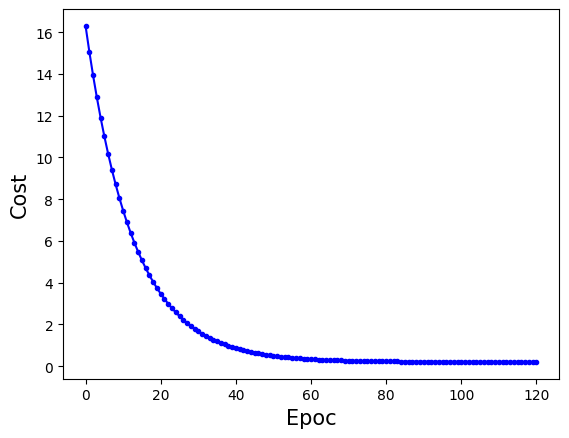

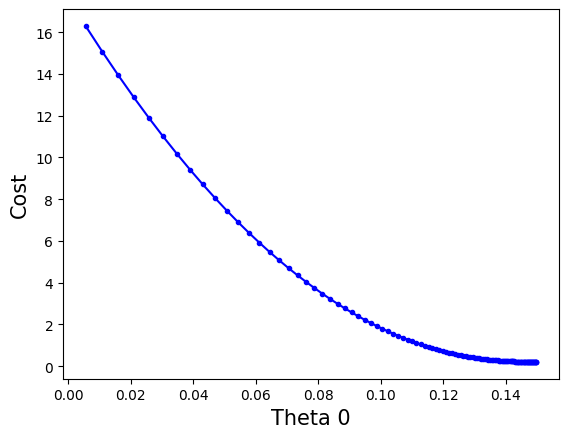

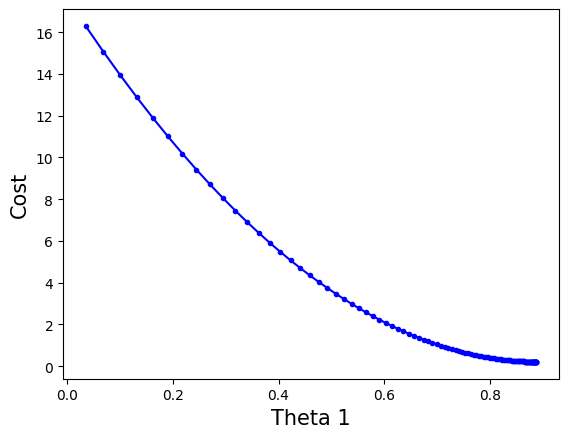

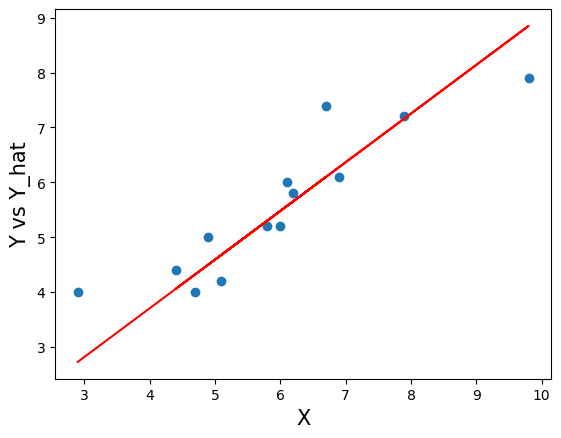

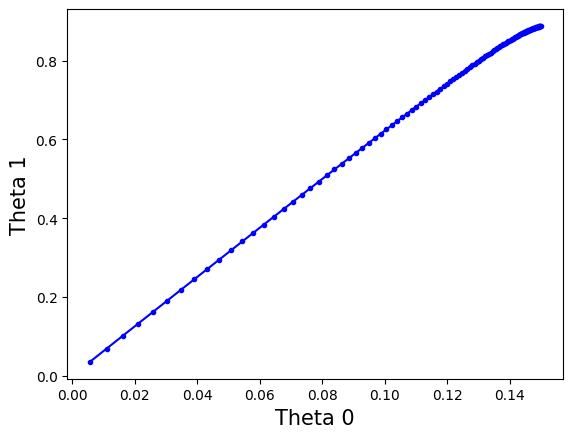

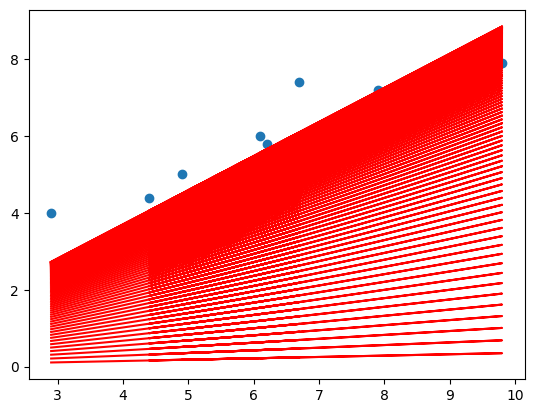

In [10]:

Gd(X,y,.001,1000)